# Exercice 3 - Identification de modèle autorégressif

## Q1 - 3 séries stationnaires

In [21]:
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np #pour gerer les moyennes + covariances +++



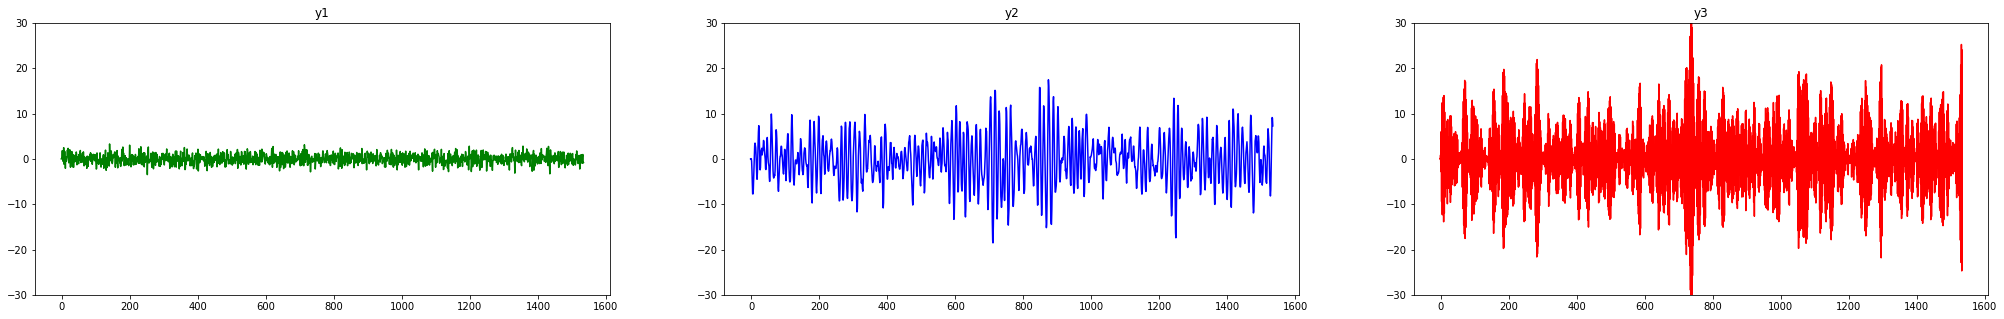

In [35]:
n=1536 #  nombre de donnees a genener
#% Sequences des parametres des 3 modeles AR du second ordre
a = [1,-0.0707,0.2500] # coefficients du premier processus AR
b = [1,-1.6674,0.9025] # Ccoefficients du second processus AR
c = [1,1.7820,0.8100]  # coefficients du troisieme processus AR


t=range(-2,n-1)
y1 = [k*0 for k in t]
y2 = [k*0 for k in t]
y3 = [k*0 for k in t]

for k in range(1,n):
    y1[k+1] = -a[1]*y1[k] - a[2]*y1[k-1] + aleas.gauss(0,1)
    y2[k+1]= -b[1]*y2[k] - b[2]*y2[k-1] + aleas.gauss(0,1)
    y3[k+1]= -c[1]*y3[k] - c[2]*y3[k-1] + aleas.gauss(0,1)


plt.figure(figsize=(35,5))
ax0 = plt.subplot(131)
ax0.set_ylim(-30,30)
ax0 = plt.plot(t,y1,"g")
ax0 = plt.title("y1")
ax1 = plt.subplot(132)
ax1.set_ylim(-30,30)
ax1 = plt.plot(t,y2,"b")
ax1 = plt.title("y2")
ax2 = plt.subplot(133)
ax2.set_ylim(-30,30)
ax2 = plt.plot(t,y3,"r")
ax2 = plt.title("y3")


D'après les 3 graphiques, on observe pour ces 3 séries un modèle stationnaire d'ordre 2 : moyenne et écart-type constants.

## Q2 - fonctions d'autocorrélation et spectres

In [31]:
def spectre(*args): 
	Np = 256 # nombre de points du spectre
	f=freqz(1,args[0],Np)[0] # recuperer les echantillons de frequences (abscisses)
	mag=[]   # hauteurs des frequences observables correspondantes (ordonnees)
	for arg in args:
		mag.append(abs(freqz(1,arg,Np)[1])) # calcul du spectre de chaque sous-serie
	return (f,mag)

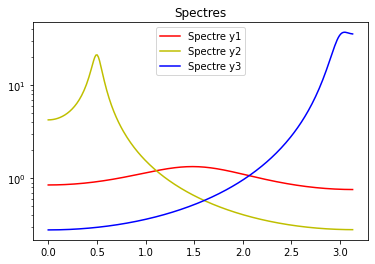

Text(0.5, 1.0, "Fonction d'autocorrélation de y3")

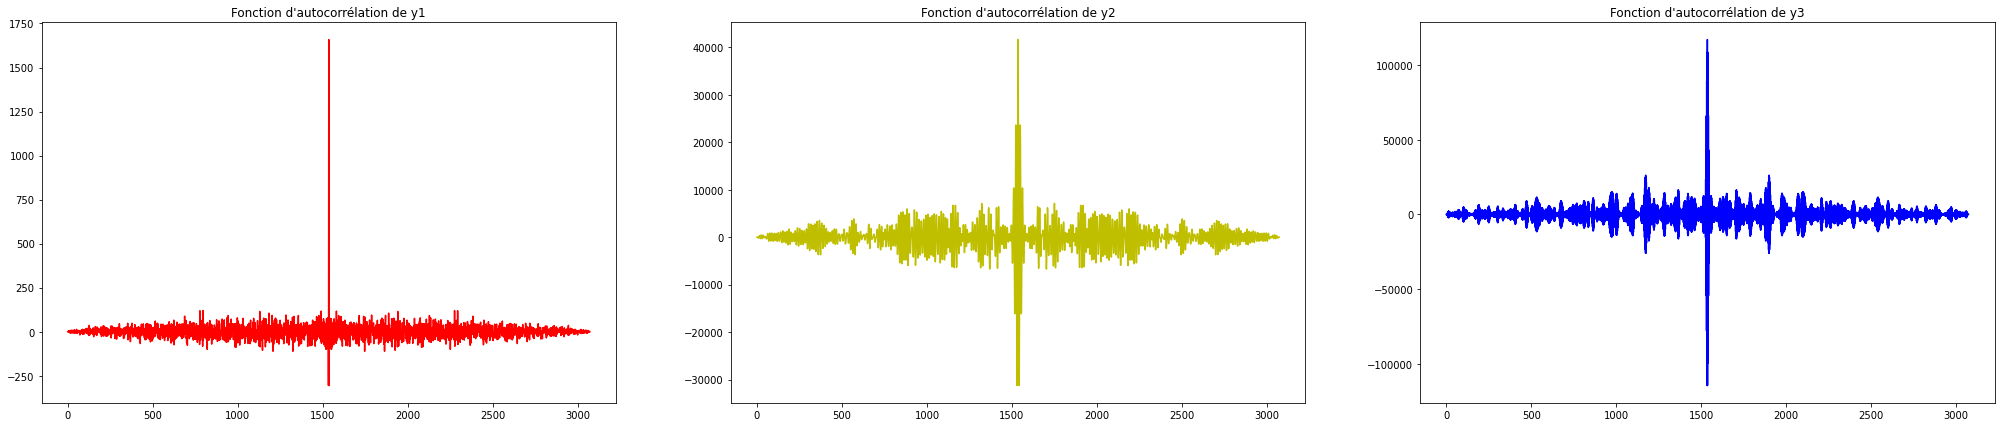

In [41]:
a=[
    [1,-0.0707,0.2500], # coefficients du premier processus AR
    [1,-1.6674,0.9025], # Ccoefficients du second processus AR
    [1, 1.7820,0.8100]  # coefficients du troisieme processus AR
]

f, mag = spectre(a[0], a[1], a[2])
## Calcul des spectres des trois sous-series 
plt.semilogy(
	f,mag[0],'r',
	f,mag[1],'y',
	f,mag[2],'b'
)
## Traces des spectres des trois sous-series 
plt.legend(['Spectre y1','Spectre y2','Spectre y3'])
plt.title("Spectres")
plt.show()

plt.figure(figsize=(35,7))
plt.subplot(131)
plt.plot(np.correlate(y1,y1,'full'), 'r')
plt.title("Fonction d'autocorrélation de y1")
plt.subplot(132)
plt.plot(np.correlate(y2,y2,'full'), 'y')
plt.title("Fonction d'autocorrélation de y2")
plt.subplot(133)
plt.plot(np.correlate(y3,y3,'full'), 'b')
plt.title("Fonction d'autocorrélation de y3")

Entre les fonctions exécutées ci-dessus, la fonction d'autocorrélation permet de mettre en évidence les différences entre les 3 processus. En effet, la fonction d'autocorrélation de y1 se démarque des deux autres de par sa forme. On peut la comparer à une fonction de Dirac où la partie positive est nettement plus importante que la partie négative, ce qui prouve la bonne corrélation avec les données. 

# Q3 - Série temporelle constituée par la somme des trois processus

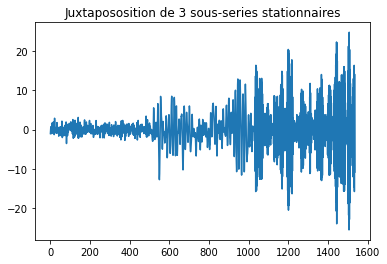

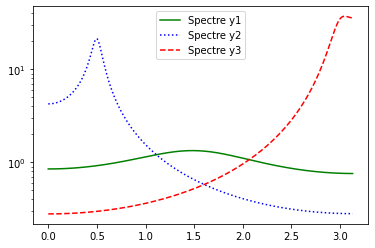

Text(0.5, 1.0, "Fonction d'autocorrélation de y1")

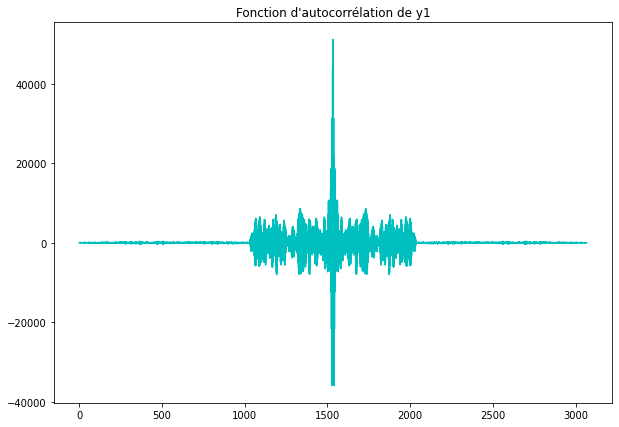

In [61]:
n=1536 #  nombre de donnees a genener
#% Sequences des parametres des 3 modeles AR du second ordre
a=[
    [1,-0.0707,0.2500], # coefficients du premier processus AR
    [1,-1.6674,0.9025], # Ccoefficients du second processus AR
    [1, 1.7820,0.8100]  # coefficients du troisieme processus AR
]

####################################################################
## Generer une serie temporelle (non-stationnaire globalement)
##    composee de 3 blocs stationnaires
####################################################################
####################################################################
## Generation et juxtaposition des 3 blocs de largeur n/3 chacun
t=range(-2,n-1)

y=[k*0 for k in t]

for k in range(1,int(n/3)):
    y[k+1]=-a[0][1]*y[k]-a[0][2]*y[k-1]+aleas.gauss(0,1)
for k in range(int(n/3)+1,2*int(n/3)):
    y[k+1]=-a[1][1]*y[k]-a[1][2]*y[k-1]+aleas.gauss(0,1)
for k in range(2*int(n/3)+1,n):
    y[k+1]=-a[2][1]*y[k]-a[2][2]*y[k-1]+aleas.gauss(0,1)

y=y[3:]  # suppression des donnees transitoires
t=t[3:]

# Trace- de la serie
plt.plot(t,y,label='Data = juxtapososition de 3 sous-series stationnaires')
plt.title("Juxtapososition de 3 sous-series stationnaires")
plt.show()

f,mag=spectre(a[0],a[1],a[2])
## Calcul des spectres des trois sous-series 
plt.semilogy(
	f,mag[0],'-g',
	f,mag[1],':b',
	f,mag[2],'--r'
)
## Traces des spectres des trois sous-series 
plt.legend(['Spectre y1','Spectre y2','Spectre y3'])
plt.show()

plt.figure(figsize=(10,7))
plt.plot(np.correlate(y,y,'full'), 'c')
plt.title("Fonction d'autocorrélation de y1")


Avec le spectre de la série composée des trois séries, on peut considérer que cette série est globalement stationnaire à l'ordre 1. On voit bien que la moyenne est constante, mais les écart-types sont différents.

# Q4 - modèle autorégressif d'ordre 2 pour la série y

In [57]:
def lpc(ordre, mat):
    ys=[]
    for i in range(ordre+1):
        ys.append(np.matrix.transpose(np.array([0]*i + mat + [0]*(ordre-i))))

    array = []
    for y in ys:
        array.append(y)
    
    A = np.array(array)

    D = np.cov(A)

    E = np.matmul(-np.linalg.inv(D[0:ordre, 0:ordre]),np.matrix.transpose(D[0,1:ordre+1]))
    E1 = [1, *np.matrix.transpose(E)]

    return E1


def modelisation_theorique(ordre,y):

    coeffs = lpc(ordre, y)
    yth = np.zeros(len(y))

    for k in range(1,len(y)-len(coeffs)-1):
        
        for j in range(1,len(coeffs)):
            yth[k+len(coeffs)]-=coeffs[j]*yth[k+len(coeffs)-j]

        yth[k+len(coeffs)]+=aleas.gauss(0,1)


    f,mag = spectre(coeffs,yth)

    fig, axs = plt.subplots(3,1,figsize=(10,10))
    fig.suptitle("Modèle autorégressif d'ordre " + str(ordre), fontsize=24)
    ax = axs[0]
    ax.plot(yth, 'c')
    ax.set_title("Y théorique à l'ordre "+ str(ordre))
    ax = axs[1]
    ax.semilogy(
        f,mag[0],'-r'
    )
    ax.set_title("Spectre")
    ax = axs[2]
    ax.plot(np.correlate(yth,yth,"full"), 'y')
    ax.set_title("Autocorrélation")
    return "Les coefficients à l'ordre 2 de notre modèle sont : " + str(coeffs[1]) + " et " + str(coeffs[2])

Les coefficients à l'ordre 2 de notre modèle sont : 0.153521441491628 et -0.7704802215929673


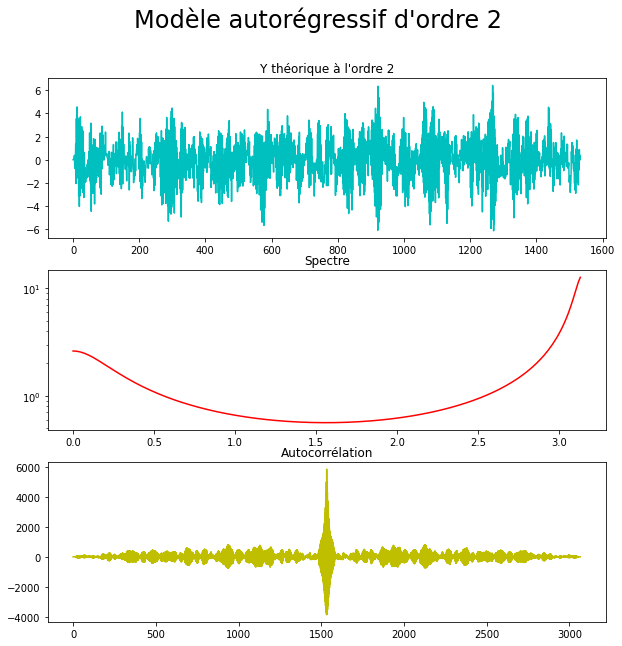

In [59]:
coeffs = lpc(2,y)
print(modelisation_theorique(2,y))

# Q5 - Modèles autorégressif d'ordre n

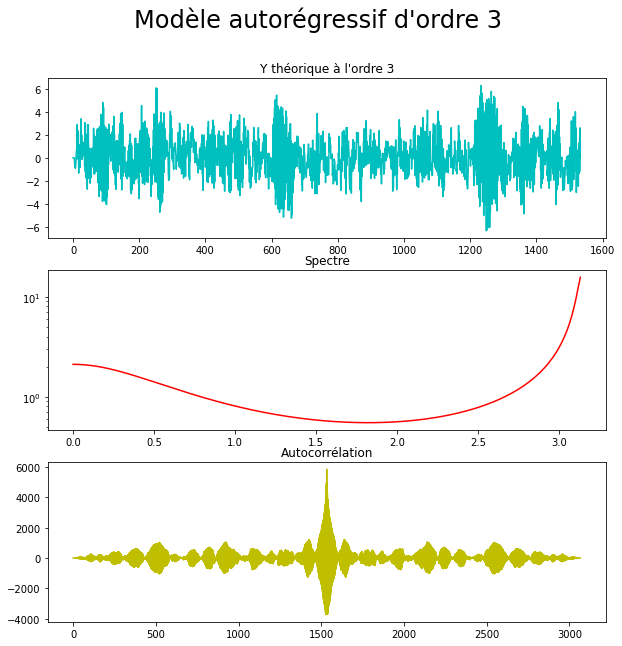

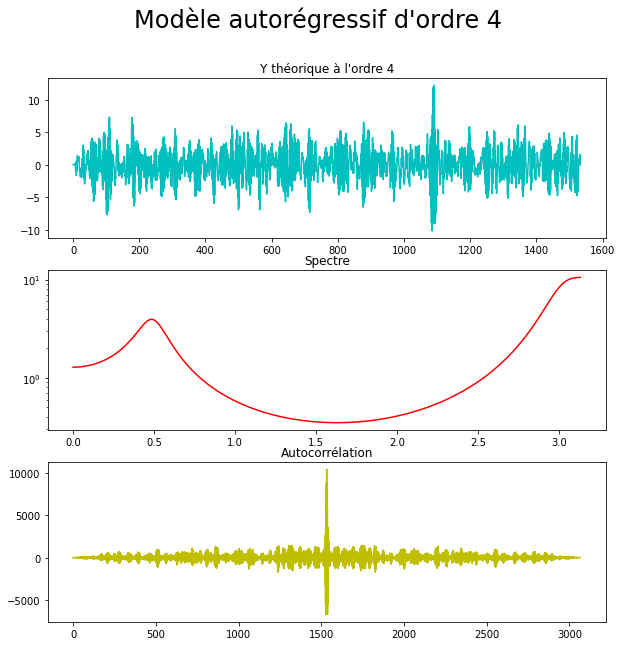

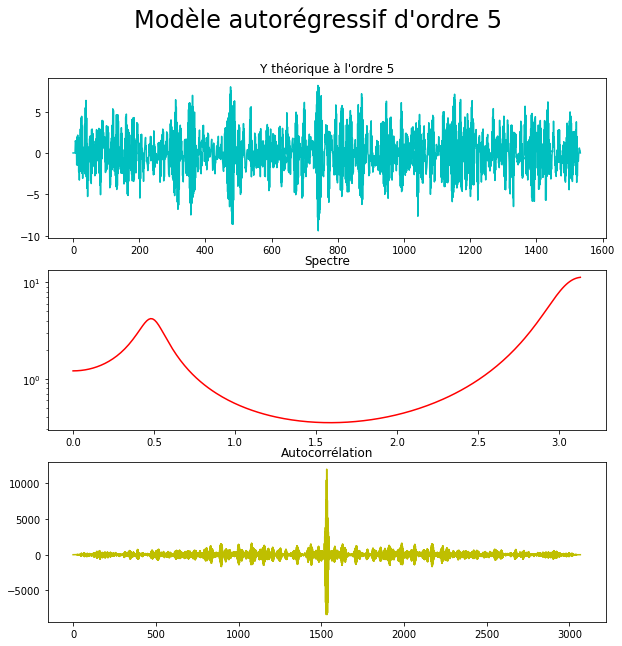

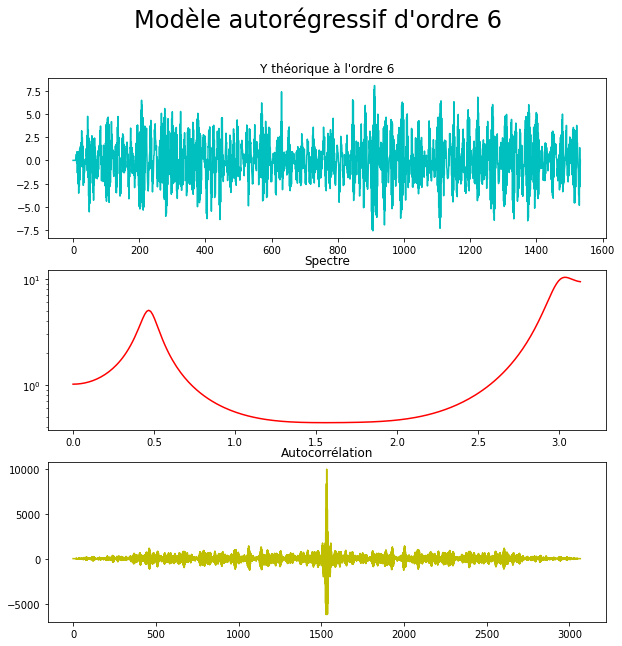

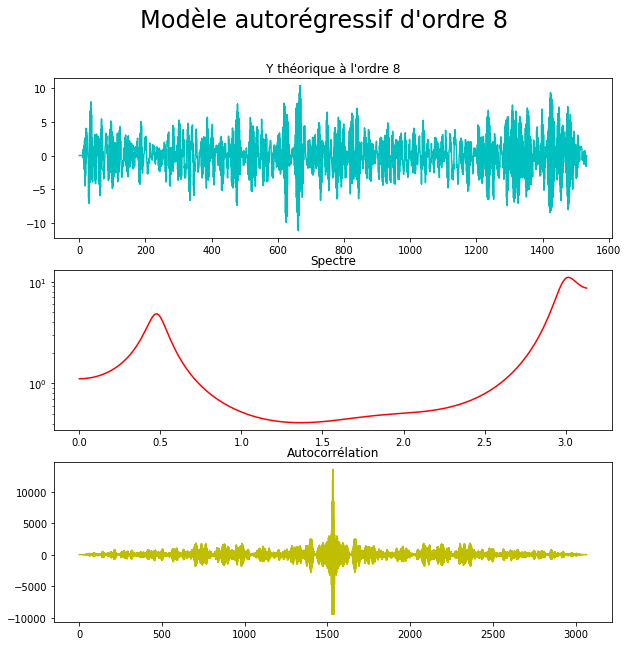

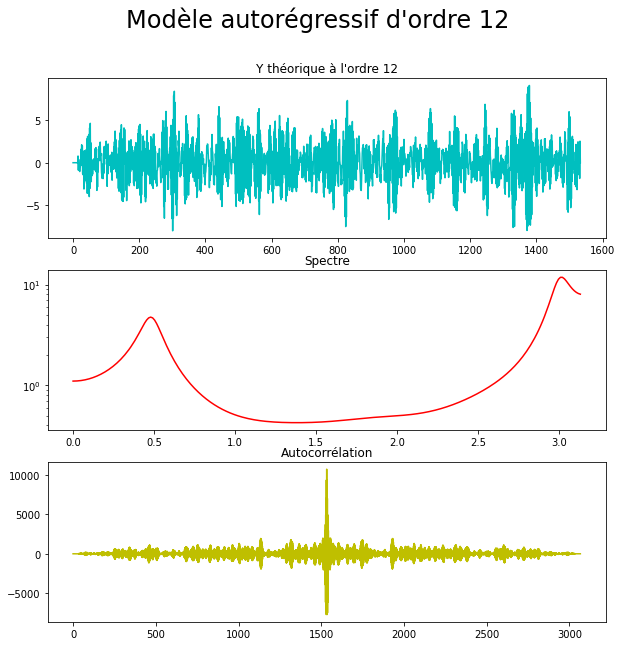

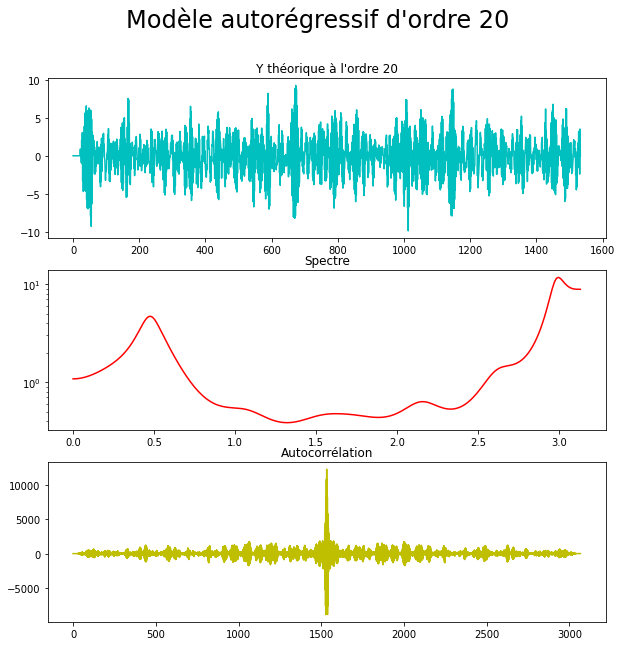

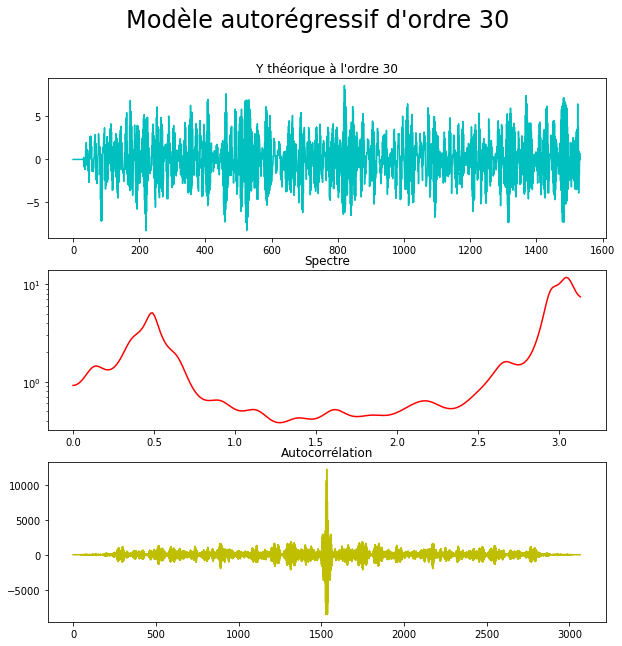

In [60]:
ordre = [3,4,5,6,8,12,20,30]    
for i in ordre:
    modelisation_theorique(i,y)

# Q6 - Juxtaposition de 3 séries & estimation des coefficients des modèles à l'ordre 3 & 4

[1, -0.20622991497025744, -0.7307716968478766, 0.424467473167172]
[1, 0.08052977391251859, -1.2244635817485148, 0.2851433894109816, 0.675575609877304]


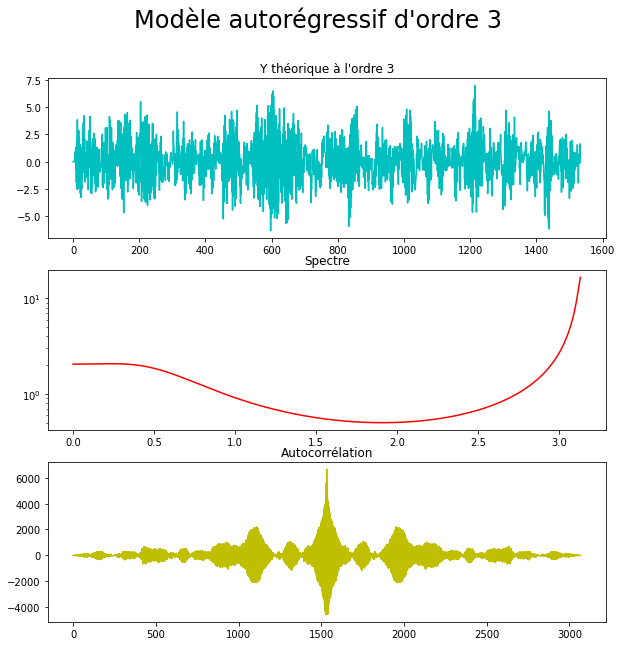

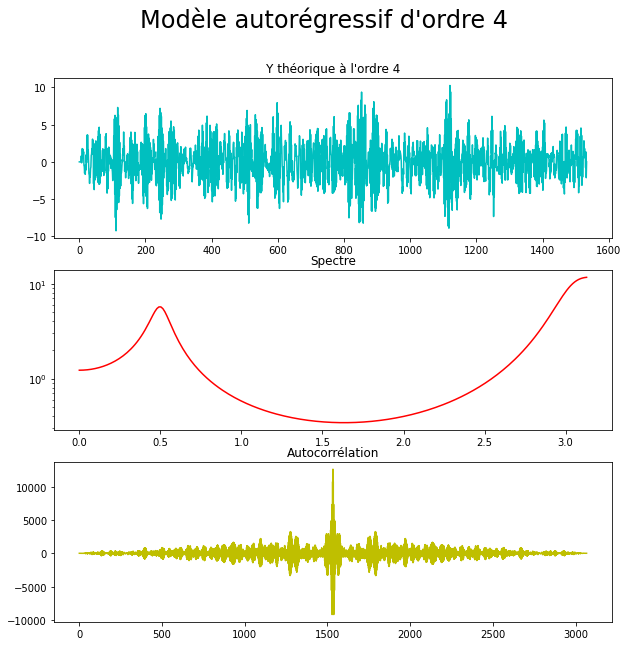

In [52]:
####################################################################
## Generer une serie temporelle (stationnaire à l'ordre 1)
##    composee de 3 blocs stationnaires à l'ordre 2
####################################################################
####################################################################
## Generation et juxtaposition des 3 blocs de largeur n/3 chacun
t=range(-2,n-1)
s=[k*0 for k in t]
for k in range(1,int(n/3)):
    s[k+1]=-a[0][1]*s[k]-a[0][2]*s[k-1]+aleas.gauss(0,1)
for k in range(int(n/3)+1,2*int(n/3)):
    s[k+1]=-a[1][1]*s[k]-a[1][2]*s[k-1]+aleas.gauss(0,1)
for k in range(2*int(n/3)+1,n):
    s[k+1]=-a[2][1]*s[k]-a[2][2]*s[k-1]+aleas.gauss(0,1)

s=s[3:]  # suppression des donnees transitoires
t=t[3:]

ordres=[3,4]
for k in ordres:
    print(lpc(k,s))
    modelisation_theorique(k,s)

f,mag=spectre(s)
plt.show()
    

Grâce à tous les résultats que l'on a tracé en comparant les différents spectres et fonctions d'autocorrélation, on peut faire la remarque suivante : lorsque l'on veut chercher des coefficients d'un modèle autorégressif à un certain ordre, il vaut mieux considérer différentes découpe d'une série. De plus il est préférable d'effectuer un model par trame a la place de juxtaposer toute les séries pour pouvoir évaluer plus précisément les coefficients du modèle.